导入数据

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Medium.ttc')  # 显示中文，字体位置

# 折线散点图

In [8]:
# 指数拟合
from scipy import log
def __log_func__(x, a, b):
    y = a * log(x) + b
    return y

def __log_fit__(x, y):
    from scipy.optimize import curve_fit
    results = {}
    popt, pcov = curve_fit(__log_func__, x, y)
    tmpa,tmpb = popt

    # r-squared
    yhat = __log_func__(x ,popt[0] ,popt[1] )                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    tmpr2 = ssreg / sstot

    return [tmpa,tmpb,tmpr2]

# 线性拟合
def __linear_func__(x, a, b):
    y = a * x + b
    return y

def __linear_fit__(x, y):
    from scipy.optimize import curve_fit
    results = {}
    popt, pcov = curve_fit(__linear_func__, x, y)
    tmpa,tmpb = popt

    # r-squared
    yhat = __log_func__(x ,popt[0] ,popt[1] )                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    tmpr2 = ssreg / sstot

    return [tmpa,tmpb,tmpr2]


x = np.array(list(range(365,1096,365)))
y = np.array([2633541,2793595,2880804])
#     print(x,y)
log_a,log_b,log_r2 = __log_fit__(x, y)
linear_a,linear_b,linear_r2 = __linear_fit__(x, y)

x2=np.array(list(range(365,1461,365)))
y2=np.array([2633541,2793595,2880804,2976000])
log_a2,log_b2,log_r22 = __log_fit__(x2, y2)

x_test = np.array(list(range(200,3000,1)))
y_log = log_a*log(x_test) + log_b
y_linear = linear_a*x_test + linear_b
y2_log = log_a2*log(x_test) + log_b2

y_2019 = [log_a*log(1460) + log_b,linear_a*1460 + linear_b,2976000]
x_2019 = [1460,1460,1460]

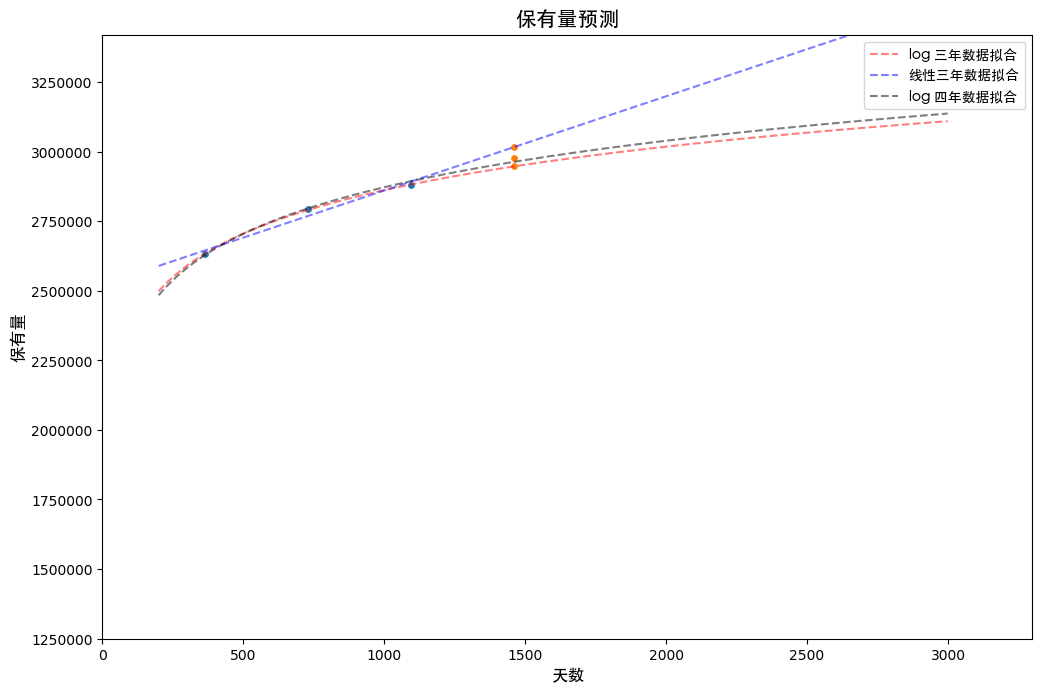

In [11]:
colors = [plt.cm.tab10(i/float(4)) for i in range(5)]
plt.figure(figsize=(12, 8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(x_test,y_log,'r--',alpha=0.5,label='log 三年数据拟合')
plt.plot(x_test,y_linear,'b--',alpha=0.5, label='线性三年数据拟合')
plt.plot(x_test,y2_log,'k--',alpha=0.5, label='log 四年数据拟合')
plt.gca().set(xlim=(0,max(x_test)*1.1)
              ,ylim=(min(y_log)*0.5, max(y_log)*1.1))
plt.scatter(x,y,cmap=colors[0],s=15)
plt.scatter(x_2019,y_2019,cmap=colors[1],s=15)
plt.xlabel('天数', fontproperties=font, fontsize=12) #X轴标签
plt.ylabel('保有量', fontproperties=font, fontsize=12) #y轴标签
plt.title('保有量预测', fontproperties=font, fontsize=15)
plt.legend(loc="upper right",prop=font,fontsize=3)
plt.show()